In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

In [2]:
# Load data
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

In [3]:
# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\Dushyant Sharma\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [4]:
# Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
# Calculate AUC
model_auc = auc(fpr, tpr)

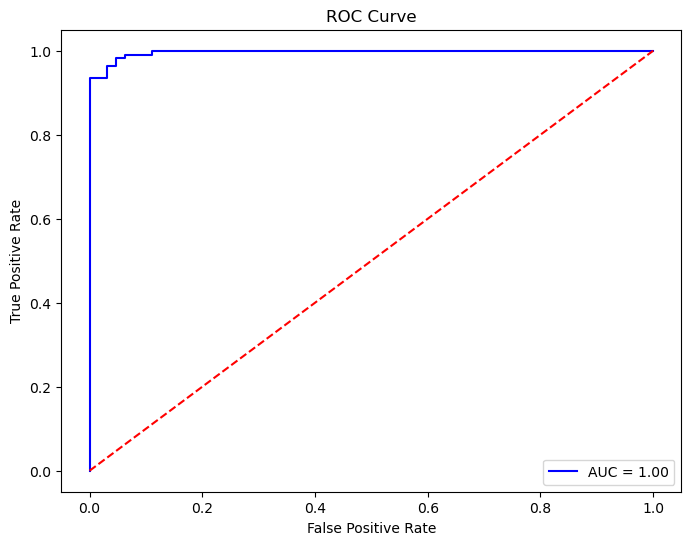

In [5]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {model_auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [6]:
# Example: Finding the best threshold for a specific TPR or FPR
best_threshold_idx = (tpr - fpr).argmax()
best_threshold = thresholds[best_threshold_idx]
print(f"Best threshold: {best_threshold:.4f}")

Best threshold: 0.8697


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc

In [8]:
# Load and prepare the dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [9]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [11]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'k-NN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [12]:
# Train models and store predictions
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_probs = model.predict_proba(X_test)[:, 1]
    predictions[name] = y_probs

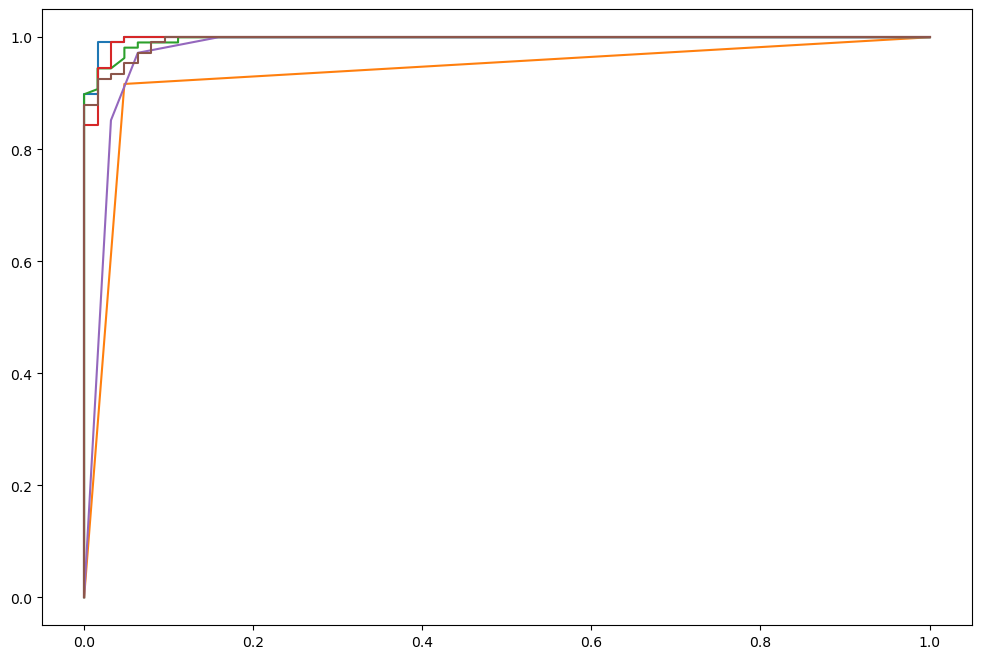

In [13]:
# Plot ROC curves for all models
plt.figure(figsize=(12, 8))
for name, y_probs in predictions.items():
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

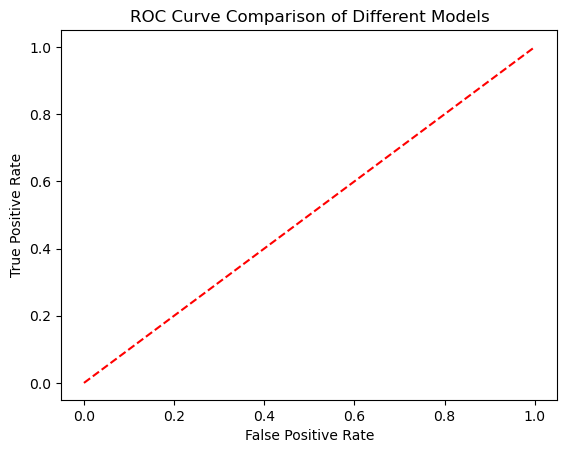

In [14]:
# Plot the random chance line
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison of Different Models')
plt.show()

In [15]:
# Example: Detailed threshold analysis for a specific model (e.g., Random Forest)
fpr, tpr, thresholds = roc_curve(y_test, predictions['Random Forest'])
best_threshold_idx = (tpr - fpr).argmax()
best_threshold = thresholds[best_threshold_idx]
print(f"Best threshold for Random Forest: {best_threshold:.4f}")

Best threshold for Random Forest: 0.6500
